### Setting up drive and Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Mount google drive and find data folder
from google.colab import drive
drive.mount('/content/drive')

# Path to folder where data is stored and define
data_path = "/content/drive/MyDrive/Senior Sem 1/Data Science/Raw Data"
os.chdir(data_path)

Mounted at /content/drive


### Socioeconomic Status and Academic Outcomes (Ruby Ahlvin)

##### This project analyzes whether socioeconomic status (SES) predicts academic outcomes such as exam scores.

In [3]:
# Load in and inspect dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# Preview dataset
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
# View column names
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
# Define study variables:
#
# SES predictors (IVs):
  # - parental education level
  # - family income
  # - internet access
  # - access to resources
# Outcomes (DV):
  # - exam score (academic performance)

In [4]:
# Check for any missing values
df.isna().sum()
# Missing values in teacher quality, parent edu, and dist from school

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [5]:
# Handle missing data:
# Only parental education level has missing values relevant to my analysis
# Drop rows missing parental education level value
df = df.dropna(subset=['Parental_Education_Level'])

# Recheck missing values to ensure code worked:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
# Convert categorical SES variables into ordered form
# Check what data looks like first:
df['Parental_Education_Level'].unique()

# Parental education level conversion (high school < college < postgraduate):
edu_order = ['High School', 'College', 'Postgraduate']
df['Parental_Education_Level'] = pd.Categorical(
    df['Parental_Education_Level'],
    categories=edu_order,
    ordered=True
)
df['ParentEdu_Num'] = df['Parental_Education_Level'].cat.codes

In [7]:
# Convert family income into ordered form
# Check data categories:
df['Family_Income'].unique()

# Family income conversion (low < medium < high)
inc_order = ['Low', 'Medium', 'High']
df['Family_Income'] = pd.Categorical(
   df['Family_Income'],
   categories=inc_order,
   ordered=True
)
df['FamInc_Num'] = df['Family_Income'].cat.codes

In [8]:
# Convert access to resources into numeric format
# Check data categories:
df['Access_to_Resources'].unique()

# Access to resources conversion (low < medium < high)
resources_order = ['Low', 'Medium', 'High']
df['Access_to_Resources'] = pd.Categorical(
    df['Access_to_Resources'],
    categories=resources_order,
    ordered=True
)
df['Resources_Num'] = df['Access_to_Resources'].cat.codes

In [9]:
# Convert internet access: create numeric binary version (Yes=1, No=0)
df['Internet_Num'] = df['Internet_Access'].map({'No':0, 'Yes':1})

In [10]:
# Create SES Index (scaled composite SES score)
# SES variables to include in the index:
ses_components = ['ParentEdu_Num', 'FamInc_Num', 'Resources_Num', 'Internet_Num']

# Scale each SES component from 0-1
scaler = MinMaxScaler()
df[ses_components] = scaler.fit_transform(df[ses_components])

# Create composite SES index
df['SES_Index'] = df[ses_components].mean(axis=1)

# Preview dataset to confirm everything looks correct:
df[['ParentEdu_Num', 'FamInc_Num', 'Resources_Num', 'Internet_Num', 'SES_Index']].head()

,ParentEdu_Num,FamInc_Num,Resources_Num,Internet_Num,SES_Index
0,0.0,0.0,1.0,1.0,0.500
1,0.5,0.5,0.5,1.0,0.625
2,1.0,0.5,0.5,1.0,0.750
3,0.0,0.5,0.5,1.0,0.500
4,0.5,0.5,0.5,1.0,0.625


In [11]:
# Regression Model 1:
# Exam Score ~ Parental Education Only
model = smf.ols("Exam_Score ~ ParentEdu_Num", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     71.68
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           3.09e-17
Time:                        19:37:39   Log-Likelihood:                -18078.
No. Observations:                6517   AIC:                         3.616e+04
Df Residuals:                    6515   BIC:                         3.617e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        66.8702      0.065   1032.327

In [12]:
# Regression Model 2:
# Exam Score ~ Multi-Factor SES Model
model2 = smf.ols("""
Exam_Score ~ ParentEdu_Num + Family_Income + Internet_Access + Access_to_Resources
""", data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     59.06
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           1.70e-71
Time:                        19:37:40   Log-Likelihood:                -17941.
No. Observations:                6517   AIC:                         3.590e+04
Df Residuals:                    6510   BIC:                         3.594e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [13]:
# Regression Model 3:
# Exam score ~ SES index
ses_model_exam = smf.ols("Exam_Score ~ SES_Index", data=df).fit()
print(ses_model_exam.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     315.8
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           5.07e-69
Time:                        19:37:42   Log-Likelihood:                -17959.
No. Observations:                6517   AIC:                         3.592e+04
Df Residuals:                    6515   BIC:                         3.594e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.5418      0.159    406.181      0.0

/tmp/ipython-input-735202855.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby("Parental_Education_Level")["Exam_Score"].mean()
/tmp/ipython-input-735202855.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_se = df.groupby("Parental_Education_Level")["Exam_Score"].sem()


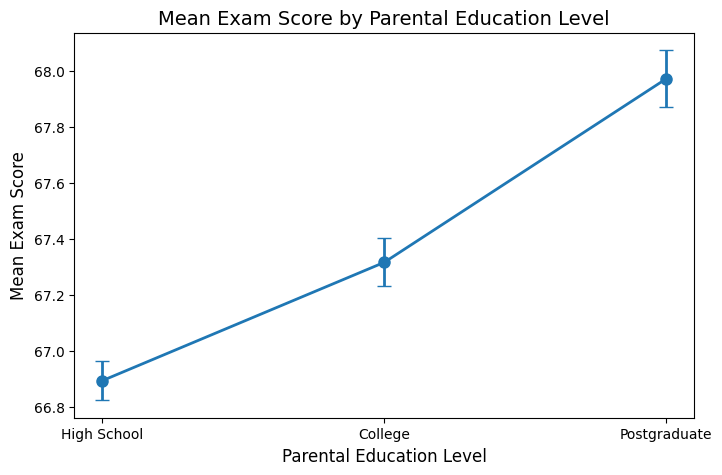

In [14]:
# Visualization 1: Mean exam score by parental education level

# Compute means and standard errors
group_means = df.groupby("Parental_Education_Level")["Exam_Score"].mean()
group_se = df.groupby("Parental_Education_Level")["Exam_Score"].sem()

# Create the plot
plt.figure(figsize=(8,5))
plt.errorbar(
    x=group_means.index,
    y=group_means,
    yerr=group_se,
    fmt='o-',
    capsize=5,
    linewidth=2,
    markersize=8
)

plt.xlabel("Parental Education Level", fontsize=12)
plt.ylabel("Mean Exam Score", fontsize=12)
plt.title("Mean Exam Score by Parental Education Level", fontsize=14)

# Save to files
plt.savefig("mean_exam_score_plot.png", dpi=300, bbox_inches="tight")

plt.show()


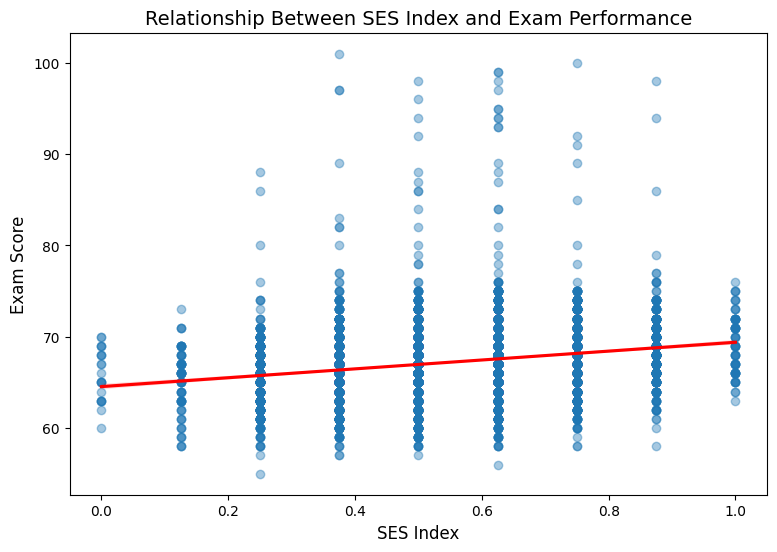

In [15]:
# Visualization 2: SES index and Exam Score scatterplot with line of best fit
plt.figure(figsize=(9,6))

sns.regplot(
    data=df,
    x='SES_Index',
    y='Exam_Score',
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.4}
)

plt.xlabel("SES Index", fontsize=12)
plt.ylabel("Exam Score", fontsize=12)
plt.title("Relationship Between SES Index and Exam Performance", fontsize=14)
# save to files
plt.savefig("ses_index_vs_exam_score.png", dpi=300, bbox_inches="tight")
plt.show()


### College Enrollment and Population Growth Data

####Nick Twum

In [ ]:
import plotly.express as px
import os

In [ ]:
# Mount google drive and find data folder
from google.colab import drive
drive.mount('/content/drive')

# Path to folder where data is stored and define
data_path = "/content/drive/MyDrive/Raw Data"
os.chdir(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
population_growth_rate = pd.read_csv("population-growth-rates.csv")

total_enrollment = pd.read_excel("Enrollment_Data.xlsx")

population_growth_rate

,Entity,Code,Year,Population growth rate - Sex: all - Age: all - Variant: estimates,Population growth rate - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,1.275,NaN
1,Afghanistan,AFG,1951,1.360,NaN
2,Afghanistan,AFG,1952,1.374,NaN
3,Afghanistan,AFG,1953,1.335,NaN
4,Afghanistan,AFG,1954,1.394,NaN
...,...,...,...,...,...
38198,Zimbabwe,ZWE,2096,NaN,0.249
38199,Zimbabwe,ZWE,2097,NaN,0.249
38200,Zimbabwe,ZWE,2098,NaN,0.225
38201,Zimbabwe,ZWE,2099,NaN,0.189


In [ ]:
import pandas as pd

df = pd.read_excel('Enrollment_Data.xlsx')

df.columns = df.columns.str.strip()

total_enrollment = df[
    (df['row_level_1'] == 'Total, all levels') &
    (df['column_level'] == 'Total')
].copy()

total_enrollment = total_enrollment[['year', 'value']]

total_enrollment['value'] = (
    total_enrollment['value']
    .astype(str)
    .str.replace(',', '')
)
total_enrollment['value'] = pd.to_numeric(total_enrollment['value'], errors='coerce')

total_enrollment = total_enrollment.sort_values('year')
print(total_enrollment)

    year     value
0   1970   7368644
1   1975   9679455
2   1980  10475055
3   1985  10596674
4   1986  10797975
5   1987  11046235
6   1988  11316548
7   1989  11742531
8   1990  11959106
9   1991  12439287
10  1992  12537700
11  1993  12323959
12  1994  12262608
13  1995  12231719
14  1996  12326948
15  1997  12450587
16  1998  12436937
17  1999  12739445
18  2000  13155393
19  2001  13715610
20  2002  14257077
21  2003  14480364
22  2004  14780630
23  2005  14963964
24  2006  15179591
25  2007  15613540
26  2008  16344592
27  2009  17464179
28  2010  18082427
29  2011  18077303
30  2012  17735638
31  2013  17476304
32  2014  17294136
33  2015  17046673
34  2016  16874649
35  2017  16773036
36  2018  16610235
37  2019  16673000
38  2020  16692000
39  2021  16721000
40  2022  16750000
41  2023  16790000
42  2024  16845000
43  2025  16901000
44  2026  16967000
45  2027  16991000
46  2028  16999000
47  2029  17003000


In [ ]:
fig = px.line(
    total_enrollment,
    x='year',
    y='value',
    title='Total Enrollment Over Time',
    labels={'value': 'Total Enrollment', 'year': 'Year'}
)
fig.show()

In [ ]:
df = pd.read_csv("population-growth-rates.csv")

import pandas as pd

df = pd.read_csv('population-growth-rates.csv')

us_data = df[df['Entity'] == 'United States'].copy()


columns_to_keep = [
    'Year',
    'Population growth rate - Sex: all - Age: all - Variant: estimates',
]
us_data = us_data[columns_to_keep]

print(us_data.head())

       Year  Population growth rate - Sex: all - Age: all - Variant: estimates
35938  1950                                              1.473                
35939  1951                                              1.461                
35940  1952                                              1.473                
35941  1953                                              1.495                
35942  1954                                              1.544                


In [ ]:
us_data = us_data.dropna()
fig = px.line(
    us_data,
    x='Year',
    y='Population growth rate - Sex: all - Age: all - Variant: estimates',

    title='US Population Growth Rate (Historical Estimates Only)',
    labels={'Population growth rate - Sex: all - Age: all - Variant: estimates': 'Growth Rate (%)'},
    markers=True
)
fig.show()

In [ ]:
change_in_enrollment = total_enrollment.diff()